<a href="https://colab.research.google.com/github/harita-gr/AI_ML_Practice/blob/main/ICT_AI_ML_LS_8_Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Social_Network_Ads.csv")

## Preprocessing

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data["User ID"].nunique()

400

In [ ]:
data.shape

(400, 5)

In [ ]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
y = data["Purchased"]
x = data[["Gender", "Age", "EstimatedSalary"]]

In [ ]:
x = pd.get_dummies(data)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=42)

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() #create instance

Training

In [ ]:
log_reg.fit(x_train,y_train)

LogisticRegression()

Predicting

In [ ]:
y_pred = log_reg.predict(x_test)

### Evaluating Metrics

Check Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.7375

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score,f1_score

In [ ]:
confusion_matrix(y_test,y_pred)

array([[49,  3],
       [18, 10]])

49 - TN, 10 - TP
18 - FN, 3 - FP




In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
precision_score(y_test,y_pred)

0.7692307692307693

In [ ]:
recall_score(y_test,y_pred)

0.35714285714285715

## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
metric_k = [] #create empty list
n = np.arange(3,15)
#creating multiple models for diff values of k (from 3 to 15) to find optimum value
for k in n:
  classifier = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)


Show accuracy scores from 3 to 15

In [ ]:
metric_k

[0.7125,
 0.7375,
 0.725,
 0.725,
 0.7375,
 0.75,
 0.75,
 0.7375,
 0.7375,
 0.725,
 0.725,
 0.725]

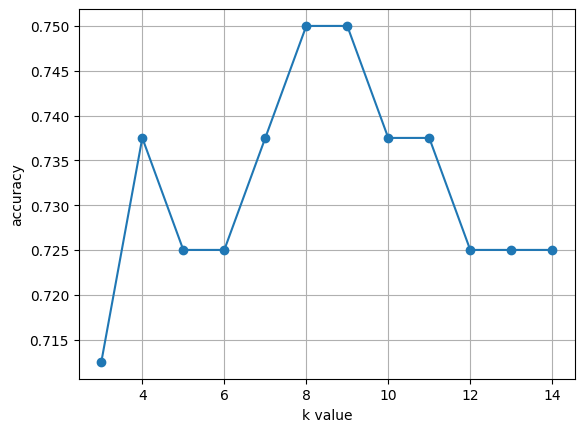

In [ ]:
plt.plot(n,metric_k,"o-")
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.grid()
plt.show()

8 or 9 can be chosen as neighbors since they have most accuracy

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=9, metric="euclidean")
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

NameError: name 'accuracy_score' is not defined

In [ ]:
confusion_matrix(y_test,y_pred)

array([[47,  5],
       [15, 13]])

## SVM Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv = SVC(kernel = "linear") #DEFAULT - rbf

In [ ]:
sv.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = sv.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.725

slightly less than what we got using KNN

In [ ]:
sv = SVC(kernel = "poly", degree = 3)
sv.fit(x_train, y_train)
y_pred = sv.predict(x_test)
accuracy_score(y_test,y_pred)

0.65

In [ ]:
sv = SVC() #rbf
sv.fit(x_train, y_train)
y_pred = sv.predict(x_test)
accuracy_score(y_test,y_pred)

0.65

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
bay = GaussianNB()

In [ ]:
#Model Training
bay.fit(x_train,y_train)

GaussianNB()

In [ ]:
nb_pred = bay.predict(x_test)

In [ ]:
accuracy_score(y_test,nb_pred)

0.95

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
# Checking for logistic regression
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_log_scaled_pred = log_reg.predict(X_test_scaled)
accuracy_score(y_test,y_log_scaled_pred)

1.0

In [ ]:
confusion_matrix(y_test,y_log_scaled_pred)

array([[52,  0],
       [ 0, 28]])